# PANDAS

Importamos la librería pandas para poder trabajar con DataFrames en Python, en caso de que no venga instalada por defecto podemos realizar lo siguiente:
* <code>pip install pandas</code>
* <code>conda install pandas</code>
* <code>conda install -c anaconda pandas </code>

In [1]:
# Importamos pandas, utilizaremos el alias para denominar a cada función de pandas 'pd'
import pandas as pd

## Series

Se trata de una colección indexada. Es la unidad mínima con la que podemos trabajar en Pandas, de hecho, un Dataframe no es más que una sucesión de series.

Las series funcionan de forma similar a un diccionario de datos donde tenemos los archivos formados por {clave_1: 'valor uno', clave_2. 'valor dos', ....., clave_n: 'valor m'}. Pueden formarse a través de un numpy array o una lista y unos valores que actuarán como índices (si no se introducen se tomarán por defecto de 0 a la longitud del conjunto de elementos).

Para crear una serie, simplemente utilizaremos la función <code>**Series**</code>

In [2]:
criptos = pd.Series(
    [5973.55, 13.85, 0.1575, 0.96, 215.29], 
    index= ['Bitcoin', 'Ethereum', 'XRP', 'Tether', 'BTC Cash']
)

criptos

Bitcoin     5973.5500
Ethereum      13.8500
XRP            0.1575
Tether         0.9600
BTC Cash     215.2900
dtype: float64

Las series tienen su propio tipo

In [3]:
type(criptos) # Clase Series

pandas.core.series.Series

## Dataframes

La función principal que nos permite pasar prácticamente cualquier tipo de variable (lista, array, diccionario de datos...) es:
* <code>__pandas.DataFrame()__</code>

Veremos cómo crear DataFrames desde diferentes estructuras de datos.

* A través del objeto **Series**

In [4]:
df_criptos = pd.DataFrame(criptos)

# Por defecto se genera una columna con nombre 0, ya que no se lo hemos especificado.
df_criptos

,0
Bitcoin,5973.5500
Ethereum,13.8500
XRP,0.1575
Tether,0.9600
BTC Cash,215.2900


* A través de **Numpy Array**

In [5]:
import numpy as np

# Creamos un array de 5 número aleatorios
array_uno = np.random.rand(5)

pd.DataFrame(array_uno)

,0
0,0.500433
1,0.827793
2,0.845436
3,0.626987
4,0.587990


Importante destacar en el ejemplo anterior, que al no utilizar ningún parámetro como índice, automáticamente ha tomado valores de 0 a n

* A través de **Listas**

In [6]:
# Creamos una lista
lista = ['hola mundo', 1, 3.14, 'adios']

# Pasamos la lista a un DataFrame
df_list = pd.DataFrame(lista)

df_list

,0
0,hola mundo
1,1
2,3.14
3,adios


* A través de un **diccionario de datos**

In [7]:
# Creamos un Diccionario de datos
dict_cli = {'ID001': 'Cliente uno',
            'ID002': 'Cliente dos',
            'ID003': 'Cliente tres',
            'ID004': 'Cliente cuatro',
            'ID005': 'Cliente cinco'}

dict_cli

{'ID001': 'Cliente uno',
 'ID002': 'Cliente dos',
 'ID003': 'Cliente tres',
 'ID004': 'Cliente cuatro',
 'ID005': 'Cliente cinco'}

In [8]:
# Pasamos el dict a un DataFrame

df_dict = pd.DataFrame.from_dict(dict_cli, orient='index')

df_dict

,0
ID001,Cliente uno
ID002,Cliente dos
ID003,Cliente tres
ID004,Cliente cuatro
ID005,Cliente cinco


Nótese que cuando se trata de un diccionario de datos, tenemos que utilizar el parámetro **orient** para que reconozca correctamente el campo clave como índice.

In [ ]:
print(type(df_dict))

### Cargando archivos a través de un CSV

Una de las grandes ventajas que supone trabajar con DataFrames es que podemos cargar archivos muy fácilmente y poder procesar sus filas y columnas. Hay varios tipos de datos que podemos cargar a pandas:

* CSV
* JSON
* HTML
* EXCEL
* HDF5
* TXT
* ORC
* STATA
* ...

Todos los tipos de datos que podemos cargar se encuentran en el siguiente link: https://pandas.pydata.org/docs/user_guide/io.html#io

A lo largo del contenido mostraremos las principales funcionalidades de los dataframes desde csv como dataframe.

Para cargar un csv como un Dataframe disponemos de la función </code>**read_csv**</code>

In [9]:
houses = pd.read_csv('housing.csv')

In [10]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Obtención de Series y Columnas de un dataframe.

Tal y como hemos visto antes un dataframe es una sucesión o colección de series, es decir, que cada columna actúa como una serie ya que todas las columnas comparten el mismo índice. 

Para acceder a una columna tenemos que escribir entre corchetes el nombre de la misma.

In [11]:
houses['housing_median_age']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

Si atendemos al tipo de clase que tiene una columna veremos que es Series

In [12]:
type(houses['housing_median_age'])

pandas.core.series.Series

Otra forma de acceder a las columnas de un dataframe es:

* nombre_df.__nombre_columna__ (sin las comillas de string)

In [13]:
houses.housing_median_age

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

### Selección de múltiples columnas

Una vez visto cómo un DataFrame se compone de Series, podemos ver cómo seleccionar varias columnas. Para ello, simplemente tenemos que encerrar entre corchetes los nombres de las columnas que queremos seleccionar como:

__nombre_df[['columna_uno', 'columna_dos', 'columna_tres']]__

Análogamente, podremos pasar una lista con nombres de las columnas.

Para realizar lo mismo mediante indexación, es decir, obtener un subconjunto de columnas del dataframe por la posición que ocupan las columnas podemos hacer:
* __nombre_dataframe[nombre_dataframe.columns[[col_n, col_m]]]__
* __nombre_dataframe.iloc[:, [col_n, col_m]]__

Mediante nombres de columnas.

In [17]:
houses[['housing_median_age', 'total_bedrooms']]

,housing_median_age,total_bedrooms
0,41.0,129.0
1,21.0,1106.0
2,52.0,190.0
3,52.0,235.0
4,52.0,280.0
...,...,...
20635,25.0,374.0
20636,18.0,150.0
20637,17.0,485.0
20638,18.0,409.0


In [15]:
target = ['housing_median_age', 'total_bedrooms', 'population']
houses[target]

,housing_median_age,total_bedrooms,population
0,41.0,129.0,322.0
1,21.0,1106.0,2401.0
2,52.0,190.0,496.0
3,52.0,235.0,558.0
4,52.0,280.0,565.0
...,...,...,...
20635,25.0,374.0,845.0
20636,18.0,150.0,356.0
20637,17.0,485.0,1007.0
20638,18.0,409.0,741.0


Mediante índices 

In [18]:
houses.columns[1]

'latitude'

In [19]:
houses.columns[0: 4]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms'], dtype='object')

In [20]:
houses[houses.columns[2:6]]

,housing_median_age,total_rooms,total_bedrooms,population
0,41.0,880.0,129.0,322.0
1,21.0,7099.0,1106.0,2401.0
2,52.0,1467.0,190.0,496.0
3,52.0,1274.0,235.0,558.0
4,52.0,1627.0,280.0,565.0
...,...,...,...,...
20635,25.0,1665.0,374.0,845.0
20636,18.0,697.0,150.0,356.0
20637,17.0,2254.0,485.0,1007.0
20638,18.0,1860.0,409.0,741.0


Para seleccionar varias columnas con iloc, tenemos que tener en cuenta que un dataframe se distribuye de la siguiente manera.

* __dataframe[filas, columnas]__: En donde tanto filas como columnas son indexables

In [21]:
houses.iloc[:,[1,3]]

,latitude,total_rooms
0,37.88,880.0
1,37.86,7099.0
2,37.85,1467.0
3,37.85,1274.0
4,37.85,1627.0
...,...,...
20635,39.48,1665.0
20636,39.49,697.0
20637,39.43,2254.0
20638,39.43,1860.0


### Selección de múltiples filas de un dataframe

Por lo general, podemos utilizar las mismas propiedades que las de las listas, salvo seleccionar una única fila que es diferente:
* Para seleccionar desde la primera fila hasta un límite realizamos: <code>__dataframe[0:n]__</code>, análogamente podemos omitir el cero y realizar simplemente: <code>__dataframe[ :n]__</code>
* Para seleccionar desde una fila hasta el final realizamos: <code>__dataframe[n:]__</code>
* Para seleccionar un rango definido de filas realizamos: <code>__dataframe[n:m]__</code>

In [22]:
# Seleccionamos de la fila 0 a la 2
houses[0:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [23]:
# Vemos que es lo mismo si quitamos el cero.
houses[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [24]:
# Seleccionamos de fila n al final
houses[20635:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [25]:
# Rango personalizado, escogemos de fila 150 a 200
houses[150:200]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
150,-122.22,37.81,52.0,2024.0,339.0,756.0,340.0,4.0720,270100.0,NEAR BAY
151,-122.22,37.81,52.0,2944.0,536.0,1034.0,521.0,5.3509,302100.0,NEAR BAY
152,-122.23,37.80,52.0,2033.0,486.0,787.0,459.0,3.1603,269500.0,NEAR BAY
153,-122.23,37.81,52.0,1433.0,229.0,612.0,213.0,4.7708,314700.0,NEAR BAY
154,-122.22,37.81,52.0,2927.0,402.0,1021.0,380.0,8.1564,390100.0,NEAR BAY
155,-122.23,37.81,52.0,2315.0,292.0,861.0,258.0,8.8793,410300.0,NEAR BAY
156,-122.24,37.81,52.0,2485.0,313.0,953.0,327.0,6.8591,352400.0,NEAR BAY
157,-122.24,37.81,52.0,1490.0,238.0,634.0,256.0,6.0302,287300.0,NEAR BAY
158,-122.23,37.81,52.0,2814.0,365.0,878.0,352.0,7.5080,348700.0,NEAR BAY
159,-122.24,37.81,52.0,2093.0,550.0,918.0,483.0,2.7477,243800.0,NEAR BAY


Para seleccionar una sola fila no podemos hacer la misma operación que en las listas, indexar una única posición <code>lista[n]</code>, ya que esto no nos devuelve nada, para ello, tenemos que seleccionar como un rango personalizado la fila que queremos mostrar más una posición <code>dataframe[n:n+1]</code>

In [26]:
houses[1000:1000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [27]:
houses[1000:1001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1000,-121.76,37.69,29.0,3433.0,711.0,1919.0,709.0,3.3841,184400.0,INLAND


### Resumen función iloc

Con la función __.iloc__ podemos seleccionar varias filas de una forma muy sencilla que puede resumirse como:
* <code>dataframe.iloc[0]</code> - Primera fila de un dataframe.
* <code>dataframe.iloc[1]</code> - Segunda fila de un dataframe.
* <code>dataframe.iloc[-1]</code> - (Indexación negativa) Última fila de un dataframe
* <code>dataframe.iloc[[n]]</code> - Fila _n_ del dataframe.
* <code>dataframe.iloc[n:m]</code> - Rango personalizado de las filas _n_ a _m_

En columnas el resumen de la función __.iloc__ pasaría a ser:
* <code>dataframe.iloc[:, 0]</code> - Primera columna de un dataframe.
* <code>dataframe.iloc[:, 1]</code> - Segunda columna de un dataframe.
* <code>dataframe.iloc[-1]</code> - (Indexación negativa) Última columna de un dataframe
* <code>dataframe.iloc[:,[n,m]]</code> - Exactamente, las columnas _n_ y _m_ de un dataframe.
* <code>dataframe.iloc[:, n:m]</code> - Rango personalizado de las columnas _n_ a _m_ de un dataframe.

Podemos también realizar una selección múltiple de columnas filas con __.iloc__ con los siguientes ejemplos:
* <code>dataframe.iloc[[0,5,7,9], [1,4]]</code> - Selección de las filas 0,5,7,9 de las columnas 1 y 4
* <code>dataframe.iloc[0:10, 0:2]</code> - Selección basada en rangos de las filas 0 a 10 de las columnas 0 a 2

In [28]:
houses.iloc[[20,5680,19875], [3, 5]]

,total_rooms,population
20,751.0,409.0
5680,1933.0,902.0
19875,792.0,641.0


In [29]:
houses.iloc[0:10, 0:3]

,longitude,latitude,housing_median_age
0,-122.23,37.88,41.0
1,-122.22,37.86,21.0
2,-122.24,37.85,52.0
3,-122.25,37.85,52.0
4,-122.25,37.85,52.0
5,-122.25,37.85,52.0
6,-122.25,37.84,52.0
7,-122.25,37.84,52.0
8,-122.26,37.84,42.0
9,-122.25,37.84,52.0


### Índices de un DataFrame

Se tratan de las posiciones que ocupa cada fila dentro de un dataframe, a no ser que se especifique un tipo de índice concreto basado en etiquetas, los índices serán de 0 a la longitud total del dataframe

In [30]:
# Creamos un dataframe
ventas = {
   'region': ["EUROPA", "EUROPA", "EUROPA", 
              "USA", "USA", "USA", "LATAM", "LATAM"],
   'ventas':[153752, 168742, 162587, 256198, 285743, 290371, 145638, 151678],
   'anio':[2018, 2019, 2020, 2018, 2019, 2020, 2018, 2019]
}
df = pd.DataFrame(ventas)
df

,region,ventas,anio
0,EUROPA,153752,2018
1,EUROPA,168742,2019
2,EUROPA,162587,2020
3,USA,256198,2018
4,USA,285743,2019
5,USA,290371,2020
6,LATAM,145638,2018
7,LATAM,151678,2019


Para observar el índice de un dataframe podemos hacer uso de su atributo <code>**index**</code>

In [31]:
df.index

RangeIndex(start=0, stop=8, step=1)

Dependiendo de cómo estén formados nuestros datos, vamos a poder crear multi índices basados en columnas propias de nuestro dataframe, si nos fijamos la columna region y anio tienen elementos repetidos. Esto nos permitirá hacer multi-índices donde tengamos un continente por año de ventas.

Con la función <code> set_index()</code> vamos a poder establecer un nuevo índice

In [34]:
region_year = df.set_index(["region", "anio"])
region_year

ventas
region anio        
EUROPA 2018  153752
       2019  168742
       2020  162587
USA    2018  256198
       2019  285743
       2020  290371
LATAM  2018  145638
       2019  151678

En vista del nuevo dataframe, podemos ver que ahora las columnas region y anio actúan como índice, por lo que si consultamos la primera fila...

In [35]:
region_year.iloc[0]

ventas    153752
Name: (EUROPA, 2018), dtype: int64

Obtenemos el dato que pertenece al volumen de ventas, siendo region (Europe) y el año (2018) sus índices

Del mismo modo, podemos pasar una lista como índice a un dataframe. Obviamente, esta lista debe ser de la misma longitud que el dataframe.

In [36]:
indice = ['REGISTRO_1', 'REGISTRO_2', 'REGISTRO_3', 'REGISTRO_4', 
          'REGISTRO_5', 'REGISTRO_6', 'REGISTRO_7', 'REGISTRO_8']

df.index = indice

df

,region,ventas,anio
REGISTRO_1,EUROPA,153752,2018
REGISTRO_2,EUROPA,168742,2019
REGISTRO_3,EUROPA,162587,2020
REGISTRO_4,USA,256198,2018
REGISTRO_5,USA,285743,2019
REGISTRO_6,USA,290371,2020
REGISTRO_7,LATAM,145638,2018
REGISTRO_8,LATAM,151678,2019


Con la función <code>.loc</code> podemos buscar elementos en el índice

In [37]:
df.loc['REGISTRO_6']

region       USA
ventas    290371
anio        2020
Name: REGISTRO_6, dtype: object

### Algunas funciones básicas de un dataframe

A continuación, vamos a ver un listado de algunas de las principales funciones que podemos aplicar en un dataframe para operar en sus columnas:

* Obtener las primeras filas de un dataframe con __<code>.head</code>__
* Obtener las últimas filas de un dataframe con __<code>.tail</code>__
* Obtener los elmentos únicos de una columna de un dataframe con __<code>.unique</code>__
* Obtener un resumen estadístico del dataset con __<code>.describe</code>__
* Obtener la media de una columna con __<code>.mean</code>__
* Obtener una copia de un dataframe con __<code>.copy</code>__
* Ver los nombres de las columnas de un dataframe con __<code>.columns</code>__
* Obtener la correlación entre todas las variables numéricas con __<code>.corr</code>__
* Borrar duplicados de un dataframe con __<code>.drop_duplicates</code>__
* Especialmente para Big Data sets podemos ver el consumo en memoria RAM de nuestro dataset con __<code>.memory_usage</code>__
* Ver un resumen resumen gráfico (basado en densidad, scatter plots y gráficas de correlaciones) de todas las variables del dataframe con __<code>.scatter_matrix</code>__
* Obtener un histograma de cada variable numérica del dataset con __<code>.hist</code>__

### Primeras filas de un Dataframe

In [38]:
# Primeras filas del dataframe
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Si en .head() no especificamos nada, por defecto, se muestran 5, podemos especificar el número de filas a mostrar.

In [39]:
houses.head(9)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


### Últimas filas de un Dataframe

Lo mismo pasa con el comando __tail__, si no le pasamos como parámetro el número de filas a visualizar, tomará las últimas 5

In [40]:
houses.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [41]:
houses.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Valores únicos por columna

In [42]:
# Observamos los valores únicos de la columna 
houses['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [43]:
houses['latitude'].unique()

array([37.88, 37.86, 37.85, 37.84, 37.83, 37.82, 37.81, 37.8 , 37.79,
       37.77, 37.78, 37.76, 37.75, 37.74, 37.73, 37.9 , 37.89, 37.87,
       37.72, 37.71, 37.7 , 37.69, 37.68, 37.64, 37.63, 37.66, 37.65,
       37.67, 37.61, 37.62, 37.6 , 37.59, 37.58, 37.57, 37.49, 37.52,
       37.56, 37.55, 37.54, 37.53, 37.51, 37.48, 37.47, 37.5 , 38.69,
       38.72, 38.52, 38.48, 38.45, 38.46, 38.43, 38.55, 38.54, 38.51,
       38.5 , 38.47, 38.44, 38.42, 38.37, 38.34, 38.32, 38.26, 38.38,
       38.4 , 38.39, 38.36, 38.31, 39.76, 39.78, 39.77, 39.74, 39.75,
       39.73, 39.71, 39.72, 39.7 , 39.82, 39.79, 39.68, 39.64, 39.66,
       39.59, 39.88, 40.06, 39.97, 39.86, 39.83, 39.8 , 39.69, 39.61,
       39.65, 39.55, 39.52, 39.53, 39.6 , 39.54, 39.5 , 39.49, 39.51,
       39.48, 39.47, 39.45, 39.44, 39.43, 39.4 , 39.39, 39.33, 39.37,
       39.35, 39.34, 39.32, 39.36, 39.38, 39.42, 39.41, 38.15, 38.12,
       38.09, 38.07, 37.97, 38.24, 38.2 , 38.16, 38.11, 38.28, 38.19,
       38.25, 38.41,

Como podemos comprobar esta es una función que tiene un mayor impacto en variables categóricas, ya por lo general, las variables numéricas tienen demasiados valores diferentes.

### Resumen estadístico

In [44]:
# Resumen estadístico.
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Es interesante observar que el resumen estadístico descarta automáticamente cualquier variable que no sea numérica.

### Media de una columna

In [47]:
print('Media de la variable total rooms', round(houses['total_rooms'].mean(), 2))
print('Media de la variable total bedrooms', round(houses['total_bedrooms'].mean(), 3))

Media de la variable total rooms 2635.76
Media de la variable total bedrooms 537.871


### Copia de un dataframe

Al igual que en listas y arrays los dataframes comparten memoria. Es fácil equivocarnos y asignar a una nueva variable un dataframe completo, posteriormente, en esta nueva variable realizar modificaciones, pensando que sólamente las estamos realizando en la copia del dataframe, pero no es así, estamos realizando modificaciones en ambos dataframes ya que al estar almacenados en memoria, comparten las mismas posiciones, veamos un ejemplo de como NO copiar un dataframe.

In [48]:
bad_copy = houses

# Modificamos la primera fila por ceros
bad_copy.iloc[[0]] = np.zeros(len(houses.columns))

bad_copy.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


Observamos que los cambios se reflejan en el dataframe original

In [49]:
houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


Por lo tanto, hemos modificado ambos dataframes, para únicamente realizar modificaciones sobre la copia, hemos de hacer uso del comando <code>.copy</code>

In [50]:
houses = pd.read_csv('housing.csv')

# Copiamos correctamente el dataframe
df_copia = houses.copy()

df_copia.iloc[[0]] = np.zeros(len(houses.columns))

df_copia.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [51]:
houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


### Correlaciones de las variables numéricas

In [52]:
houses.corr()

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4542/1837568766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Nótese que automáticamente toma todas las variables numéricas.

### Nombres de las columnas de un dataframe

In [53]:
houses.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [54]:
houses.columns[3]

'total_rooms'

Las columnas de un dataframe pueden trabajarse como listas

### Borrar duplicados de un dataframe

In [55]:
# Para verlo más claro, vamos a realizar una copia de las diez primeras posiciones del data frame
ten_rows = houses.head(10).copy()

In [56]:
# Duplicamos la fila 9
ten_rows = ten_rows.append(ten_rows.iloc[[9]])
ten_rows = ten_rows.append(ten_rows.iloc[[9]])

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4542/486206084.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ten_rows = ten_rows.append(ten_rows.iloc[[9]])
/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4542/486206084.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ten_rows = ten_rows.append(ten_rows.iloc[[9]])


In [57]:
ten_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [58]:
ten_rows = ten_rows.drop_duplicates(inplace = False, keep = 'first')
ten_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Uso de RAM para un dataframe

In [59]:
# Consumo RAM del dataframe en BYTES
houses.memory_usage()

Index                    128
longitude             165120
latitude              165120
housing_median_age    165120
total_rooms           165120
total_bedrooms        165120
population            165120
households            165120
median_income         165120
median_house_value    165120
ocean_proximity       165120
dtype: int64

### Análisis gráfico con scatter matrix

Using matplotlib backend: <object object at 0x7fe62a6dcd40>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


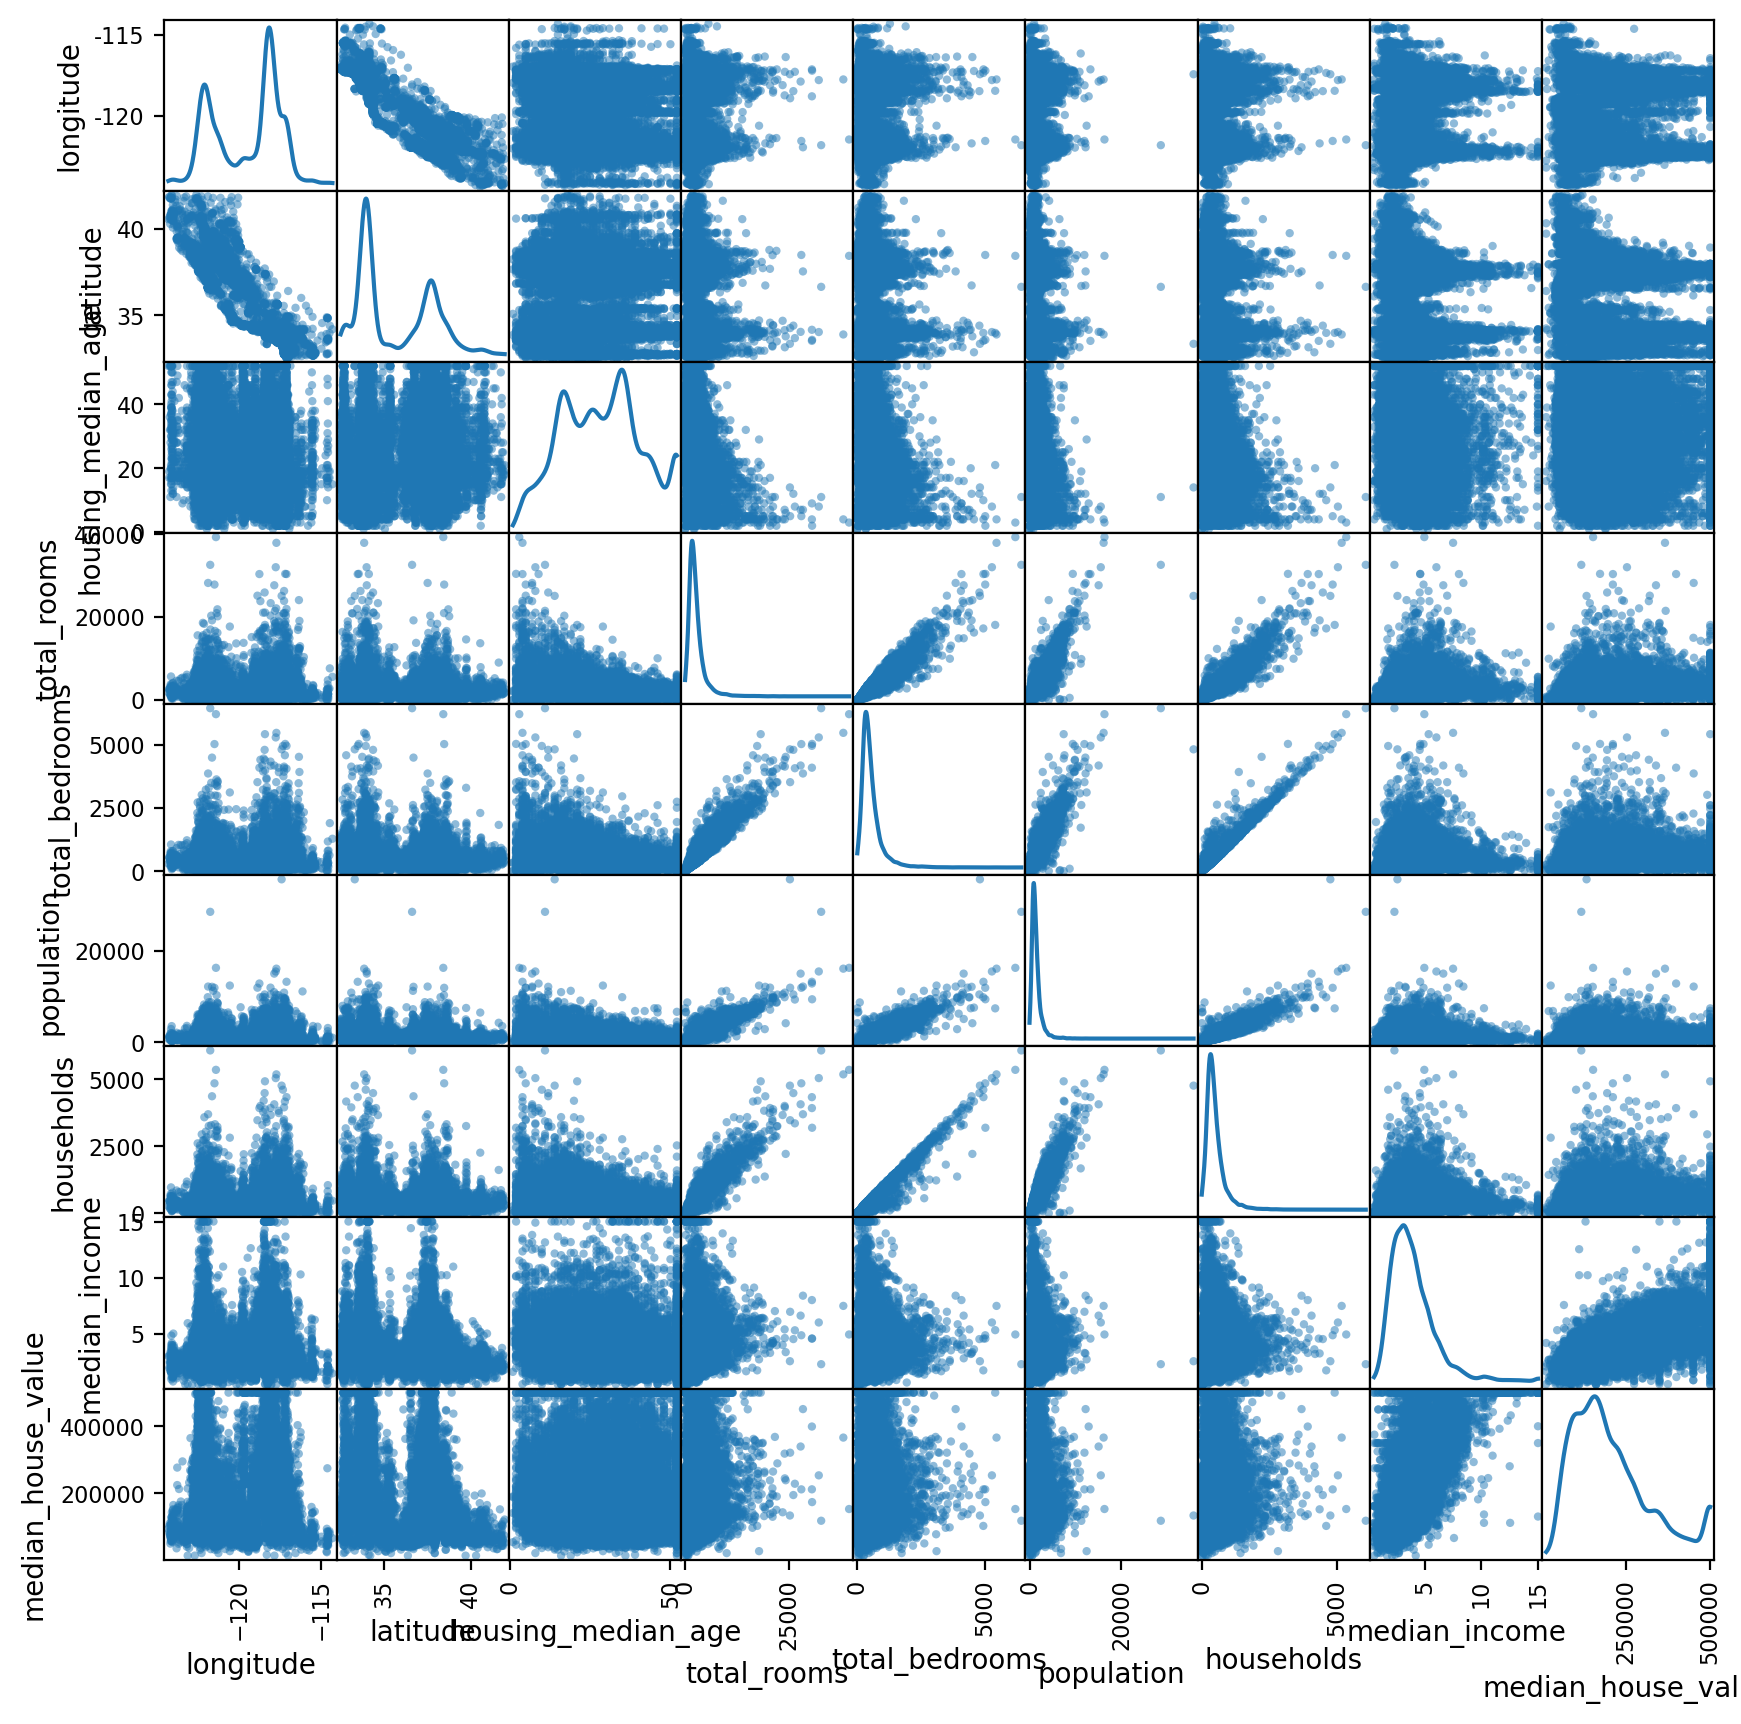

In [60]:
# Configuración para mostrar gráficas en notebook
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Importamos scatter_matrix
from pandas.plotting import scatter_matrix

# Es necesario que configuremos el tamaño de las gráficas que será el mismo que el número de columnas
scatter_matrix(houses, figsize = (len(houses.columns), 
                                  len(houses.columns)), 
               diagonal = 'kde');

### Histogramas de las variables numéricas 

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

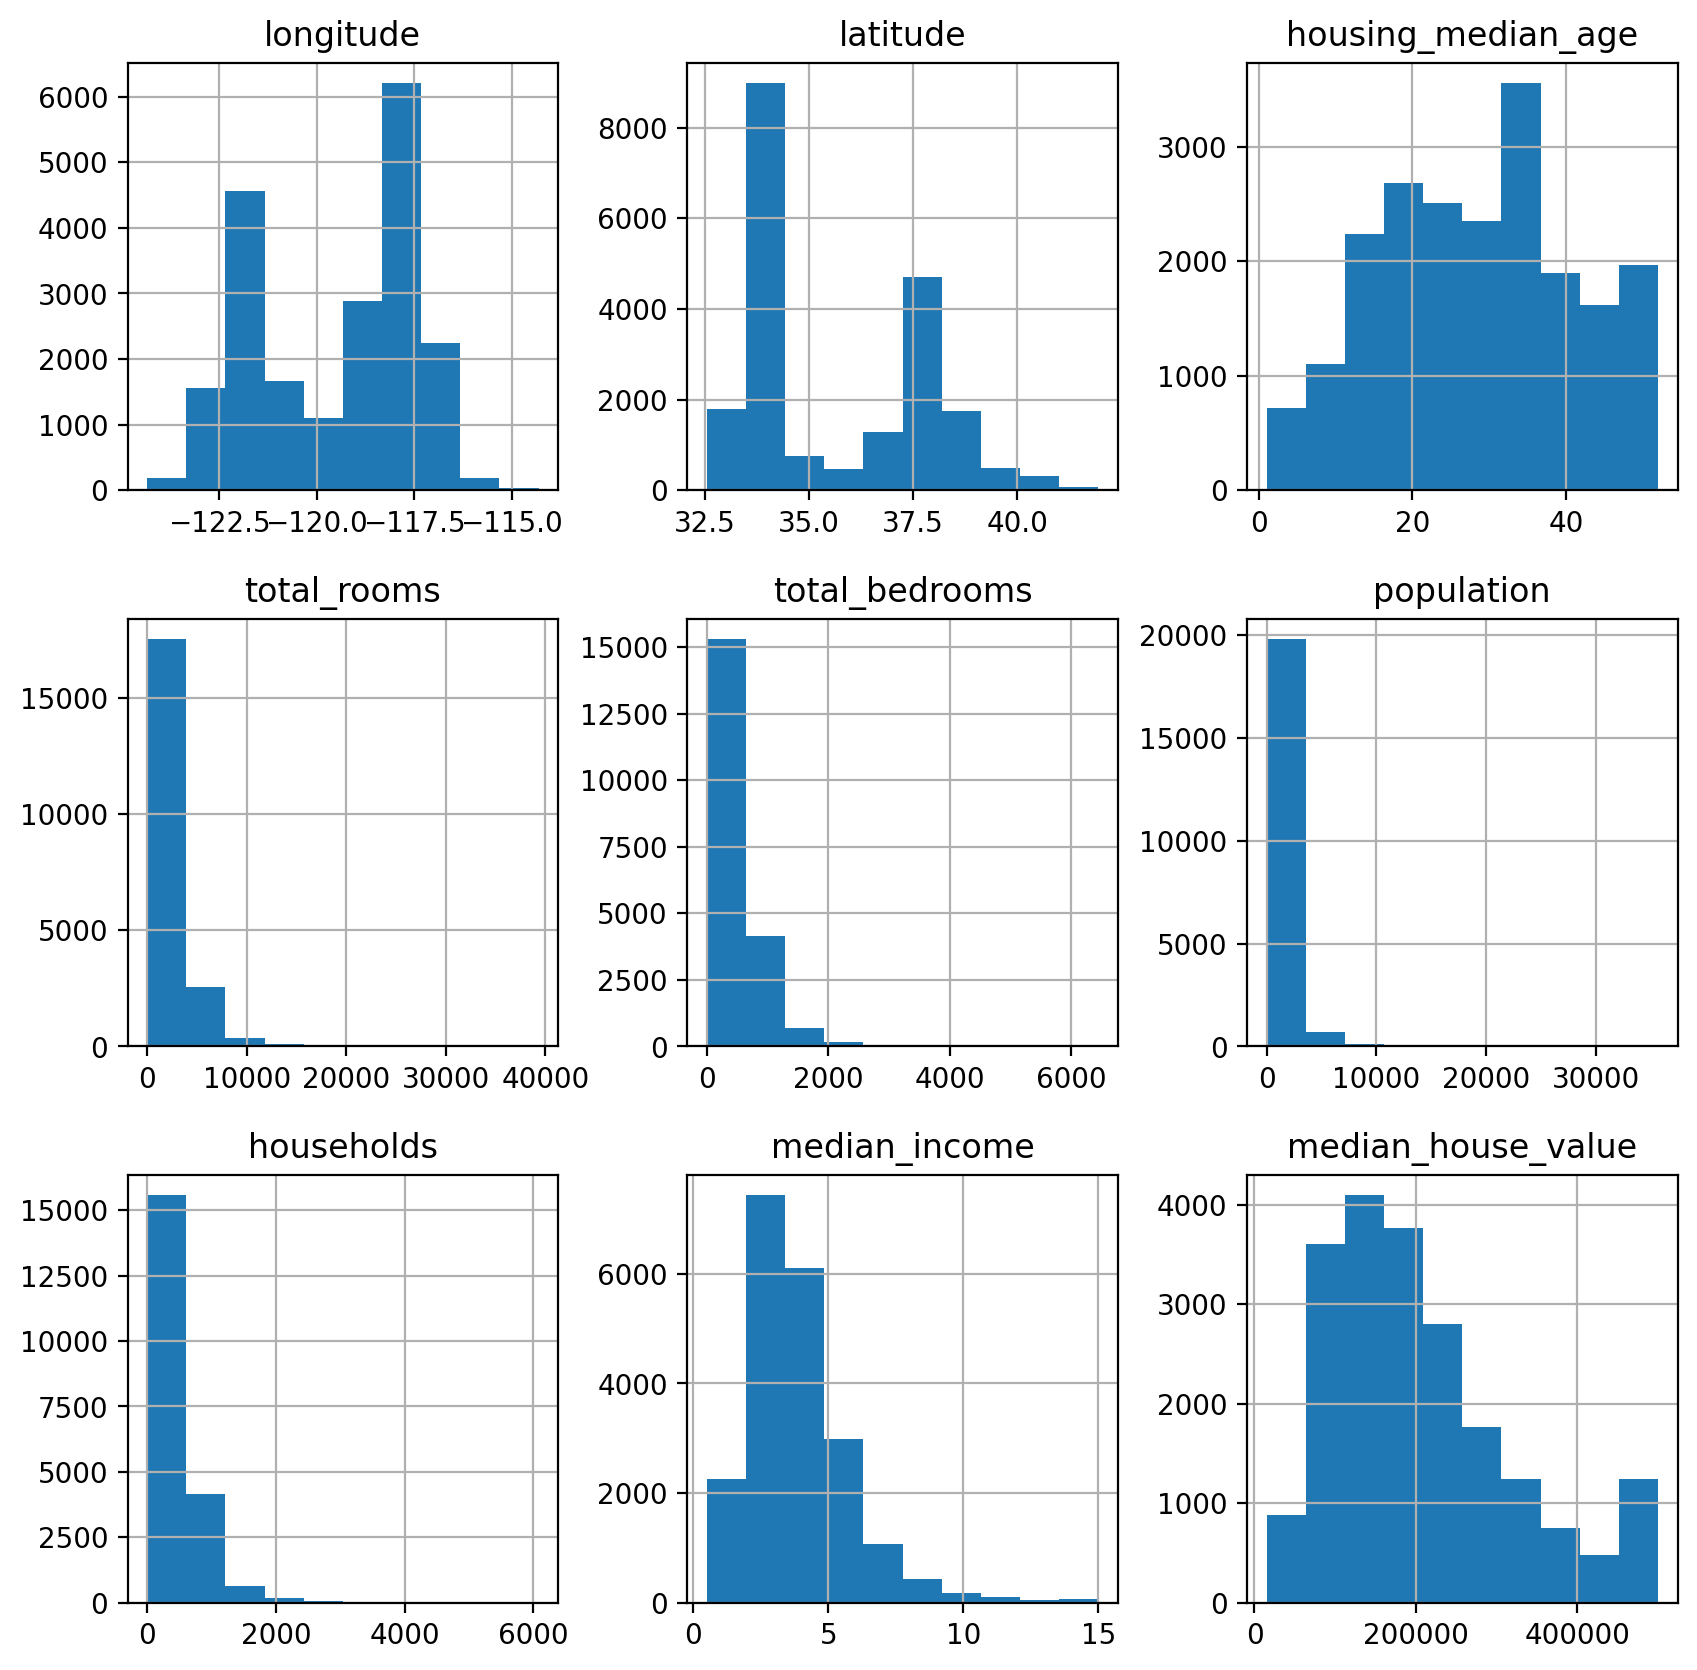

In [61]:
# Histogramas de cada variable continua del dataframe.
houses.hist(figsize = (len(houses.columns), len(houses.columns)))

### UNIÓN DE DATAFRAMES - GROUP BY

Al igual que en SQL, desde Python también podemos realizar agrupaciones de nuestros datos con la función __<code>groupby</code>__

In [62]:
# Agrupamos por la media de los valores numéricos para la columna ocean_proximity
houses.groupby(['ocean_proximity']).mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [63]:
# Observamos cuántos tipos el total de dormitorios en función de su frecuencia.
houses.groupby(['total_bedrooms']).count()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
total_bedrooms,,,,,,,,,
1.0,1,1,1,1,1,1,1,1,1
2.0,2,2,2,2,2,2,2,2,2
3.0,5,5,5,5,5,5,5,5,5
4.0,7,7,7,7,7,7,7,7,7
5.0,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...
5290.0,1,1,1,1,1,1,1,1,1
5419.0,1,1,1,1,1,1,1,1,1
5471.0,1,1,1,1,1,1,1,1,1


In [64]:
houses.groupby(['total_bedrooms']).count()['ocean_proximity']

total_bedrooms
1.0       1
2.0       2
3.0       5
4.0       7
5.0       6
         ..
5290.0    1
5419.0    1
5471.0    1
6210.0    1
6445.0    1
Name: ocean_proximity, Length: 1923, dtype: int64

In [65]:
# Obtener el porcentaje de valores para una variable categórica
print((pd.crosstab(index=houses["ocean_proximity"], columns="count"))/len(houses) * 100)

col_0                count
ocean_proximity           
<1H OCEAN        44.263566
INLAND           31.739341
ISLAND            0.024225
NEAR BAY         11.094961
NEAR OCEAN       12.877907


### MERGE DE DATAFRAMES

En algunas ocasiones, vamos a necesitar unir dos o más datasets para ello, en primer lugar, al igual que con listas, podemos hacer uso de la función __<code>.append</code>__

Debido a la dimensión de filas y columnas del dataframe, vamos a crear dos dataframes más reducidos para poder ejemplificar correctamente la función append.

In [66]:
# Creamos datasets reducidos
first_positions = houses[['housing_median_age', 
                             'total_rooms', 
                             'total_bedrooms']].head(5).copy()


last_positions = houses[['housing_median_age', 
                             'total_rooms', 
                             'total_bedrooms']].tail(4).copy()

print(first_positions.shape)
print(last_positions.shape)

(5, 3)
(4, 3)


In [67]:
# Unimos ambos datasets con append
first_positions = first_positions.append(last_positions)

print(first_positions.shape)

(9, 3)


/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4542/1538513824.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_positions = first_positions.append(last_positions)


In [68]:
first_positions

,housing_median_age,total_rooms,total_bedrooms
0,41.0,880.0,129.0
1,21.0,7099.0,1106.0
2,52.0,1467.0,190.0
3,52.0,1274.0,235.0
4,52.0,1627.0,280.0
20636,18.0,697.0,150.0
20637,17.0,2254.0,485.0
20638,18.0,1860.0,409.0
20639,16.0,2785.0,616.0


Es importante que tengamos en cuenta con la presencia de nuevas columnas que aparezcan solamente en uno de los dataframes que vayamos a concatenar. Para ejemplificarlo, vamos a obtener de nuevo los datasets, dando una columna a más al dataset con las últimas posiciones.

In [69]:
# Creamos datasets reducidos
first_positions = houses[['housing_median_age', 
                             'total_rooms', 
                             'total_bedrooms']].head(5).copy()


last_positions = houses[['housing_median_age', 
                             'total_rooms', 
                             'total_bedrooms',
                             'households']].tail(4).copy()

print(first_positions.shape)
print(last_positions.shape)

(5, 3)
(4, 4)


In [70]:
# Unimos ambos datasets con append
first_positions = first_positions.append(last_positions)

first_positions

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4542/223953611.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_positions = first_positions.append(last_positions)


,housing_median_age,total_rooms,total_bedrooms,households
0,41.0,880.0,129.0,NaN
1,21.0,7099.0,1106.0,NaN
2,52.0,1467.0,190.0,NaN
3,52.0,1274.0,235.0,NaN
4,52.0,1627.0,280.0,NaN
20636,18.0,697.0,150.0,114.0
20637,17.0,2254.0,485.0,433.0
20638,18.0,1860.0,409.0,349.0
20639,16.0,2785.0,616.0,530.0


En segundo lugar, podemos hacer uso de la función __<code>.concat</code>__. Es muy importante saber los tipos de unión ( _join_ ) que podemos realizar al concatenar datasets
* __inner__: Se realiza la unión por los elementos comunes de ambos datasets.
* __outer__: La unión se realiza por todos los elementos entre los datasets
    
Se recomienda echar un vistazo a la documentación para ver los diferentes tipos de join que podemos realizar. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [71]:
first_positions = houses[['housing_median_age', 
                             'total_rooms', 
                             'total_bedrooms',
                             'ocean_proximity']].head(5).copy()


last_positions = houses[['housing_median_age', 
                             'total_rooms', 
                             'total_bedrooms',
                             'households',
                             'ocean_proximity']].tail(4).copy()

union_outer = pd.concat([first_positions, last_positions], 
                        ignore_index=True, join='outer')

union_outer

,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,households
0,41.0,880.0,129.0,NEAR BAY,NaN
1,21.0,7099.0,1106.0,NEAR BAY,NaN
2,52.0,1467.0,190.0,NEAR BAY,NaN
3,52.0,1274.0,235.0,NEAR BAY,NaN
4,52.0,1627.0,280.0,NEAR BAY,NaN
5,18.0,697.0,150.0,INLAND,114.0
6,17.0,2254.0,485.0,INLAND,433.0
7,18.0,1860.0,409.0,INLAND,349.0
8,16.0,2785.0,616.0,INLAND,530.0


In [72]:
union_inner = pd.concat([first_positions, last_positions], 
                        ignore_index=True, join='inner')

union_inner

,housing_median_age,total_rooms,total_bedrooms,ocean_proximity
0,41.0,880.0,129.0,NEAR BAY
1,21.0,7099.0,1106.0,NEAR BAY
2,52.0,1467.0,190.0,NEAR BAY
3,52.0,1274.0,235.0,NEAR BAY
4,52.0,1627.0,280.0,NEAR BAY
5,18.0,697.0,150.0,INLAND
6,17.0,2254.0,485.0,INLAND
7,18.0,1860.0,409.0,INLAND
8,16.0,2785.0,616.0,INLAND


Como podemos ver en el merge por tipo _inner_ la columna _households_ del nuevo dataset no aparece ya que no es un elemento común entre ambos datasets. No obstante hemos de tener en cuenta que si un dataset no tiene filas pertenecientes a una columna de otro dataset como es el caso de la columna _households_ que únicamente aparece en el nuevo dataset. Sus valores, pasarán a ser nulos.

### NUEVAS COLUMNAS

En muchas ocasiones, vamos a necesitar añadir nuevas columnas a un dataframe o realizar modificaciones entre las columnas de un dataframe para obtener una nueva. Es importante saber que las operaciones se realizan de forma columnar, es decir, si dos columnas tienen una misma longitud podemos realizar una operación entre ambas sin necesidad de iterar sobre sus filas.

Para agregar una nueva columna simplemente podemos crear una nueva variable con el nombre del dataframe y el nombre de la columna que vamos a crear.

In [73]:
np.random.randint(65, 120, 10)

array([ 94,  88, 115,  80,  81,  85, 119,  67, 117,  68])

In [74]:
union_inner['area'] = np.random.randint(65, 120, len(union_inner))

print(union_inner.columns)

Index(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'ocean_proximity', 'area'],
      dtype='object')


In [75]:
union_inner.head()

,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,area
0,41.0,880.0,129.0,NEAR BAY,104
1,21.0,7099.0,1106.0,NEAR BAY,105
2,52.0,1467.0,190.0,NEAR BAY,94
3,52.0,1274.0,235.0,NEAR BAY,75
4,52.0,1627.0,280.0,NEAR BAY,89


In [76]:
# Podemos crear una nueva columna que sea la media de camas por habitaciones totales

union_inner['mean_bedrooms'] = round(union_inner['total_rooms'] / union_inner['total_bedrooms'],2)

In [77]:
union_inner

,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,area,mean_bedrooms
0,41.0,880.0,129.0,NEAR BAY,104,6.82
1,21.0,7099.0,1106.0,NEAR BAY,105,6.42
2,52.0,1467.0,190.0,NEAR BAY,94,7.72
3,52.0,1274.0,235.0,NEAR BAY,75,5.42
4,52.0,1627.0,280.0,NEAR BAY,89,5.81
5,18.0,697.0,150.0,INLAND,76,4.65
6,17.0,2254.0,485.0,INLAND,118,4.65
7,18.0,1860.0,409.0,INLAND,110,4.55
8,16.0,2785.0,616.0,INLAND,104,4.52


### BORRADO DE FILAS Y COLUMNAS

En algunas ocasiones, cuando realicemos limpieza de datos o, porque no sean objeto de nuestro análisis vamos a necesitar borrar filas o columnas de un dataframe, para ambos casos la función es la misma __<code>.drop</code>__, si el borrado queremos realizarlo para filas usaremos en el parámetro __axis__ el valor 0 y para las columnas el valor 1.

In [78]:
union_inner = union_inner.drop(['housing_median_age', 'mean_bedrooms'], axis = 1)

union_inner

,total_rooms,total_bedrooms,ocean_proximity,area
0,880.0,129.0,NEAR BAY,104
1,7099.0,1106.0,NEAR BAY,105
2,1467.0,190.0,NEAR BAY,94
3,1274.0,235.0,NEAR BAY,75
4,1627.0,280.0,NEAR BAY,89
5,697.0,150.0,INLAND,76
6,2254.0,485.0,INLAND,118
7,1860.0,409.0,INLAND,110
8,2785.0,616.0,INLAND,104


In [79]:
# Borrado por filas
print('TODAS LAS FILAS')
print(union_inner, "\n")

union_inner = union_inner.drop(3, axis=0)

print('BORRADO DE FILA 3')
print(union_inner.head(5))

TODAS LAS FILAS
   total_rooms  total_bedrooms ocean_proximity  area
0        880.0           129.0        NEAR BAY   104
1       7099.0          1106.0        NEAR BAY   105
2       1467.0           190.0        NEAR BAY    94
3       1274.0           235.0        NEAR BAY    75
4       1627.0           280.0        NEAR BAY    89
5        697.0           150.0          INLAND    76
6       2254.0           485.0          INLAND   118
7       1860.0           409.0          INLAND   110
8       2785.0           616.0          INLAND   104 

BORRADO DE FILA 3
   total_rooms  total_bedrooms ocean_proximity  area
0        880.0           129.0        NEAR BAY   104
1       7099.0          1106.0        NEAR BAY   105
2       1467.0           190.0        NEAR BAY    94
4       1627.0           280.0        NEAR BAY    89
5        697.0           150.0          INLAND    76


### GESTIÓN DE NULOS

Finalmente, como es habitual cuando trabajamos con dataframes pueden aparecer los _missing values_ o simplemente, valores nulos, en Python representados por el string __NaN__, mediante la función __<code>.isnull</code>__ podremos saber si un elemento de un dataframe es nulo o no, una práctica muy habitual es obtener el número de valores nulos por columna en un dataframe y su porcentaje.

In [80]:
print("*CANTIDAD de datos nulos por columna en el dataframe")
print(union_outer.isnull().sum())
print("----------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(union_outer.isnull().sum()/len(union_outer)*100)

*CANTIDAD de datos nulos por columna en el dataframe
housing_median_age    0
total_rooms           0
total_bedrooms        0
ocean_proximity       0
households            5
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
housing_median_age     0.000000
total_rooms            0.000000
total_bedrooms         0.000000
ocean_proximity        0.000000
households            55.555556
dtype: float64


Si lo que queremos es reemplazar los valores nulos y no borrarlos haremos uso de la función __<code>.fillna</code>__

In [81]:
union_outer['households'] = union_outer['households'].fillna(5)

In [82]:
union_outer

,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,households
0,41.0,880.0,129.0,NEAR BAY,5.0
1,21.0,7099.0,1106.0,NEAR BAY,5.0
2,52.0,1467.0,190.0,NEAR BAY,5.0
3,52.0,1274.0,235.0,NEAR BAY,5.0
4,52.0,1627.0,280.0,NEAR BAY,5.0
5,18.0,697.0,150.0,INLAND,114.0
6,17.0,2254.0,485.0,INLAND,433.0
7,18.0,1860.0,409.0,INLAND,349.0
8,16.0,2785.0,616.0,INLAND,530.0


In [83]:
print("*CANTIDAD de datos nulos por columna en el data frame")
print(union_outer.isnull().sum())

*CANTIDAD de datos nulos por columna en el data frame
housing_median_age    0
total_rooms           0
total_bedrooms        0
ocean_proximity       0
households            0
dtype: int64


Por el contrario, si lo que queremos es borrar los valores nulos de un dataframe podemos hacer uso de la función __<code>.dropna</code>__

In [84]:
union_outer = pd.concat([first_positions, last_positions], 
                        ignore_index=True, join='outer', sort=False)

union_outer = union_outer.dropna()

print("*CANTIDAD de datos nulos por columna en el data frame")
print(union_outer.isnull().sum())

print(union_outer.shape)

*CANTIDAD de datos nulos por columna en el data frame
housing_median_age    0
total_rooms           0
total_bedrooms        0
ocean_proximity       0
households            0
dtype: int64
(4, 5)


In [85]:
union_outer

,housing_median_age,total_rooms,total_bedrooms,ocean_proximity,households
5,18.0,697.0,150.0,INLAND,114.0
6,17.0,2254.0,485.0,INLAND,433.0
7,18.0,1860.0,409.0,INLAND,349.0
8,16.0,2785.0,616.0,INLAND,530.0


### Escribiendo dataframe como csv

Al igual que podemos cargar datos de diferentes fuentes de datos y procesarlos como un dataframe, también podemos posteriormente escribir un dataframe en una de las múltiples fuentes que acepta pandas para exportar archivos, en esta ocasión, volcaremos la información de un dataframe como un .csv, para ello, disponemos de la función <code>**to_csv**</code>. Como parámetros utilizaremos, el nombre del archivo, el argumento __sep__ para utilizar un tipo de separador u otro y, si no queremos que se muestre el índice del dataframe, utilizaremos el argumento __index__ con valor _none_

In [86]:
union_outer.to_csv('RESULTADOS.csv', sep=',', index=None)